In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
close = pd.read_csv('../data/processed/bov_close.csv', index_col=0, parse_dates=True)

In [5]:
itub = close[['ITUB4']].copy().dropna()

In [6]:
itub.head()

,ITUB4
2016-01-04,15.230303
2016-01-05,15.357575
2016-01-06,15.296969
2016-01-07,15.006060
2016-01-08,15.012121


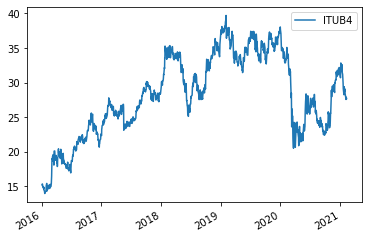

In [7]:
itub.plot();

In [8]:
itub_ret = np.log(itub.pct_change(1) + 1)

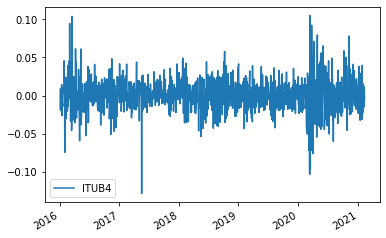

In [9]:
itub_ret.plot();

In [10]:
itub['SMA-10'] = itub['ITUB4'].rolling(10).mean()

In [11]:
itub.head(20)

,ITUB4,SMA-10
2016-01-04,15.230303,NaN
2016-01-05,15.357575,NaN
2016-01-06,15.296969,NaN
2016-01-07,15.006060,NaN
2016-01-08,15.012121,NaN
2016-01-11,14.836363,NaN
2016-01-12,14.903030,NaN
2016-01-13,14.672727,NaN
2016-01-14,14.884848,NaN
2016-01-15,14.496969,14.969697


In [12]:
type(itub['ITUB4'].rolling(10))

pandas.core.window.rolling.Rolling

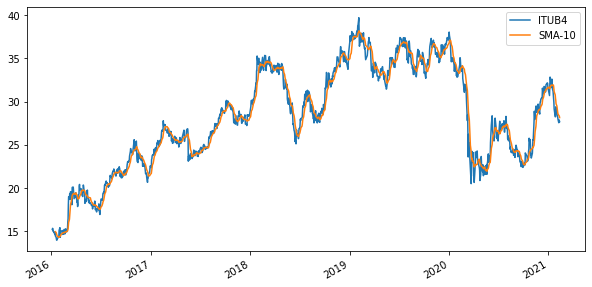

In [13]:
itub.plot(figsize=(10, 5));

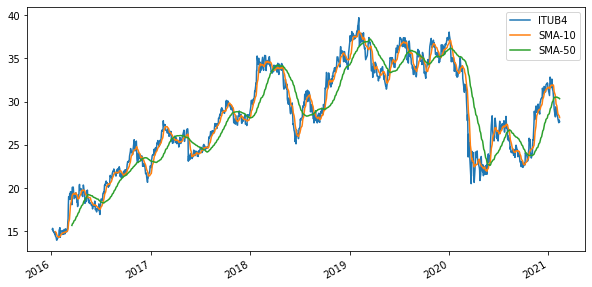

In [14]:
itub['SMA-50'] = itub['ITUB4'].rolling(50).mean()
itub.plot(figsize=(10, 5));

In [16]:
itub_mglu = close[['ITUB4', 'MGLU3']].copy().dropna()
cov = itub_mglu.rolling(50).cov()
cov

ITUB4     MGLU3
2016-01-04 ITUB4       NaN       NaN
           MGLU3       NaN       NaN
2016-01-05 ITUB4       NaN       NaN
           MGLU3       NaN       NaN
2016-01-06 ITUB4       NaN       NaN
...                    ...       ...
2021-02-09 MGLU3 -0.666829  0.885896
2021-02-10 ITUB4  2.308207 -0.717730
           MGLU3 -0.717730  0.888931
2021-02-11 ITUB4  2.399403 -0.785603
           MGLU3 -0.785603  0.907800

[2540 rows x 2 columns]

In [17]:
cov.loc['2018-02-07'].to_numpy()

array([[6.58557742, 0.48318676],
       [0.48318676, 0.06229876]])

In [18]:
itub_mglu_ret =np.log(1 + itub_mglu.pct_change(1))
itub_mglu_ret.head()

,ITUB4,MGLU3
2016-01-04,NaN,NaN
2016-01-05,0.008322,0.009976
2016-01-06,-0.003954,-0.090581
2016-01-07,-0.019201,-0.142549
2016-01-08,0.000404,0.004181


In [20]:
itub_mglu_ret['ITUB-SMA-50'] = itub_mglu_ret['ITUB4'].rolling(50).mean()
itub_mglu_ret['MGLU-SMA-50'] = itub_mglu_ret['MGLU3'].rolling(50).mean()

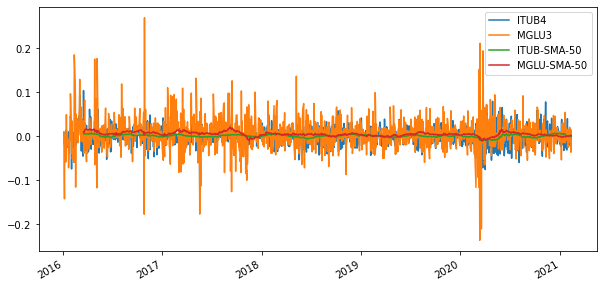

In [21]:
itub_mglu_ret.plot(figsize=(10, 5));

In [22]:
cov = itub_mglu_ret[['ITUB-SMA-50', 'MGLU-SMA-50']].rolling(50).cov()
cov.tail()

ITUB-SMA-50   MGLU-SMA-50
2021-02-09 MGLU-SMA-50 -7.818915e-08  1.707482e-06
2021-02-10 ITUB-SMA-50  7.013588e-06 -1.591714e-07
           MGLU-SMA-50 -1.591714e-07  1.673339e-06
2021-02-11 ITUB-SMA-50  7.458514e-06 -2.231614e-07
           MGLU-SMA-50 -2.231614e-07  1.661871e-06

In [23]:
corr = itub_mglu_ret[['ITUB-SMA-50', 'MGLU-SMA-50']].rolling(50).corr()
corr.tail(16)

ITUB-SMA-50  MGLU-SMA-50
2021-02-02 ITUB-SMA-50     1.000000     0.108415
           MGLU-SMA-50     0.108415     1.000000
2021-02-03 ITUB-SMA-50     1.000000     0.105378
           MGLU-SMA-50     0.105378     1.000000
2021-02-04 ITUB-SMA-50     1.000000     0.112380
           MGLU-SMA-50     0.112380     1.000000
2021-02-05 ITUB-SMA-50     1.000000     0.103455
           MGLU-SMA-50     0.103455     1.000000
2021-02-08 ITUB-SMA-50     1.000000     0.034767
           MGLU-SMA-50     0.034767     1.000000
2021-02-09 ITUB-SMA-50     1.000000    -0.023540
           MGLU-SMA-50    -0.023540     1.000000
2021-02-10 ITUB-SMA-50     1.000000    -0.046463
           MGLU-SMA-50    -0.046463     1.000000
2021-02-11 ITUB-SMA-50     1.000000    -0.063386
           MGLU-SMA-50    -0.063386     1.000000